# Analysis of Traffic Agent Positions

In [1]:
from model import NaSchTraffic
from mesa.batchrunner import BatchRunner

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MultipleLocator
from numpy.random import default_rng

rng = default_rng()

sns.set_theme()
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)

generate_new = False
load_file = "data/positions_df_" + "210422_1819" + ".pkl"

In [2]:
if generate_new:
    model = NaSchTraffic(height=1,
                         width=1000,
                         vehicle_density=0.12,
                         general_max_speed=5,
                         p_randomisation=0.5,
                         seed=100,
                         debug=1)

    while model.running and model.schedule.steps < 2000:
        model.step()
    print(model.schedule.steps) # Show how many steps have actually run

    model_out = model.datacollector.get_model_vars_dataframe()
    # SAVE TO FILE
    time_str = time.strftime("%y%m%d_%H%M")
    model_out.to_pickle("data/positions_df_" + time_str + ".pkl")
else:
    # LOAD FROM FILE
    model_out = pd.read_pickle(load_file)

model_out.head()

,Average_Speed,Density,Flow,Agent_Positions
0,0.000000,0.00,0,[]
1,0.500000,0.12,0,"[(447, 0, 0), (189, 0, 0), (705, 0, 0), (704, ..."
2,0.902778,0.12,0,"[(447, 1, 0), (189, 1, 0), (705, 1, 0), (704, ..."
3,1.250000,0.12,0,"[(447, 2, 0), (189, 2, 0), (706, 2, 1), (704, ..."
4,1.583333,0.12,0,"[(448, 3, 1), (189, 3, 0), (707, 3, 1), (705, ..."


Test plot:

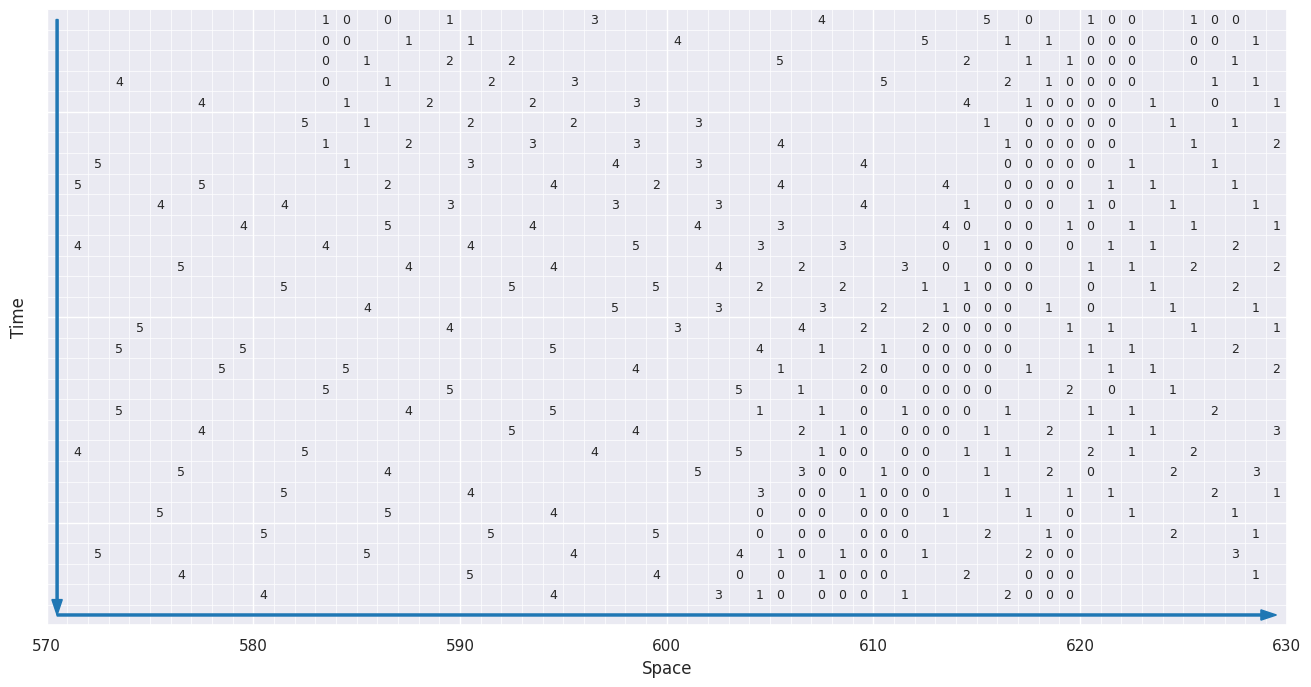

In [3]:
xmin = 570
dx = 60
xmax = xmin + dx
ymin = 1485
dy = 30
ymax = ymin + dy

sns.set_theme()

fig, axes = plt.subplots(1,1, figsize=(16, 8))
plt.xlim([xmin, xmax])
plt.ylim([ymax, ymin])
plt.minorticks_on()

for row in model_out.Agent_Positions:
    for (x, y, val) in row:
        if xmin < x < xmax and ymin < y < ymax:
            axes.text(x+0.3, y-0.3, str(val), size=9)
axes.arrow(xmin+0.5, ymin+0.5, 0, (dy-1), width=0.1, head_width=0.5, length_includes_head=True, color="tab:blue")
axes.arrow(xmin+0.5, ymax-0.5, dx-1, 0, width=0.1, head_width=0.5, length_includes_head=True, color="tab:blue")
axes.xaxis.set_minor_locator(MultipleLocator(1))
axes.yaxis.set_major_locator(MultipleLocator(10))
axes.yaxis.set_minor_locator(MultipleLocator(1))
axes.set(xlabel='Space', ylabel='Time')
axes.set_yticklabels([])
axes.grid(True, which='minor', linewidth=.5)
time_str = time.strftime("%y%m%d_%H%M")
fig.savefig("img/agent_movement_1" + time_str + ".png")

plt.show()